In [1]:
import os
import pandas as pd 
import alpaca_trade_api as tradeapi 
from MCForecastTools import MCSimulation

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [4]:
timeframe = "1D"

tickers = ["MSFT", "KO"]

start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.head(10)

KO                                     MSFT  \
                            open     high    low  close    volume    open   
2019-05-01 00:00:00-04:00  48.95  49.0750  48.55  48.58   8497194  130.53   
2019-05-02 00:00:00-04:00  48.53  48.7657  48.27  48.40   7045641  127.98   
2019-05-03 00:00:00-04:00  48.60  48.9600  48.52  48.72   5839237  127.36   
2019-05-06 00:00:00-04:00  48.33  48.6100  48.26  48.48   6740245  126.39   
2019-05-07 00:00:00-04:00  48.23  48.2900  47.77  48.00   8795261  126.46   
2019-05-08 00:00:00-04:00  48.05  48.2300  47.82  47.85   7457062  125.44   
2019-05-09 00:00:00-04:00  47.80  47.9800  47.07  47.40   9460182  124.29   
2019-05-10 00:00:00-04:00  47.41  48.2950  47.40  48.20   7864053  124.91   
2019-05-13 00:00:00-04:00  47.91  48.1300  47.73  48.05   8533003  124.11   
2019-05-14 00:00:00-04:00  48.53  49.3200  48.35  48.68  11258616  123.87   

                                                               
                             high     low     close    volume  
2019-05-01 00:00:00-04:00  130.65  127.70  127.8768  23607029  
2019-05-02 00:00:00-04:00  128.00  125.52  126.2000  24625810  
2019-05-03 00:00:00-04:00  129.43  127.25  128.8900  21930200  
2019-05-06 00:00:00-04:00  128.56  126.11  128.1600  19544222  
2019-05-07 00:00:00-04:00  127.18  124.22  125.5700  29045897  
2019-05-08 00:00:00-04:00  126.37  124.75  125.4400  20819937  
2019-05-09 00:00:00-04:00  125.79  123.57  125.5100  23111514  
2019-05-10 00:00:00-04:00  127.93  123.82  127.1900  26418546  
2019-05-13 00:00:00-04:00  125.55  123.04  123.3100  28096397  
2019-05-14 00:00:00-04:00  125.88  123.70  124.7200  20940204

In [5]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [6]:
MCfive_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.60, 0.40],
    num_simulation = 300,
    num_trading_days = 5*252
)

In [15]:
MCfive_year.portfolio_data.head()

KO                                               \
                            open     high    low  close   volume daily_return   
2019-05-01 00:00:00-04:00  48.95  49.0750  48.55  48.58  8497194          NaN   
2019-05-02 00:00:00-04:00  48.53  48.7657  48.27  48.40  7045641    -0.003705   
2019-05-03 00:00:00-04:00  48.60  48.9600  48.52  48.72  5839237     0.006612   
2019-05-06 00:00:00-04:00  48.33  48.6100  48.26  48.48  6740245    -0.004926   
2019-05-07 00:00:00-04:00  48.23  48.2900  47.77  48.00  8795261    -0.009901   

                             MSFT                                      \
                             open    high     low     close    volume   
2019-05-01 00:00:00-04:00  130.53  130.65  127.70  127.8768  23607029   
2019-05-02 00:00:00-04:00  127.98  128.00  125.52  126.2000  24625810   
2019-05-03 00:00:00-04:00  127.36  129.43  127.25  128.8900  21930200   
2019-05-06 00:00:00-04:00  126.39  128.56  126.11  128.1600  19544222   
2019-05-07 00:00:00-04:00  126.46  127.18  124.22  125.5700  29045897   

                                        
                          daily_return  
2019-05-01 00:00:00-04:00          NaN  
2019-05-02 00:00:00-04:00    -0.013113  
2019-05-03 00:00:00-04:00     0.021315  
2019-05-06 00:00:00-04:00    -0.005664  
2019-05-07 00:00:00-04:00    -0.020209

In [16]:
MCfive_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.977788  1.019103  1.014178  0.993370  0.981787  1.007174  1.004263   
2     0.977805  1.003072  1.030990  0.994792  0.996507  1.012994  1.014984   
3     0.968395  1.002359  1.032610  1.006731  1.001203  1.009292  1.044131   
4     0.956255  0.986434  1.043999  1.012579  0.986922  1.029469  1.039247   
...        ...       ...       ...       ...       ...       ...       ...   
1256  3.977577  3.667476  3.203254  2.839031  1.528765  2.008761  2.420063   
1257  4.028455  3.766104  3.123891  2.811368  1.521227  1.986095  2.445402   
1258  3.987581  3.640971  3.150769  2.768043  1.473820  1.967912  2.505235   
1259  4.029717  3.658232  3.117812  2.762281  1.460649  2.035205  2.563548   
1260  4.049335  3.700248  3.072489  2.804256  1.504148  2.011731  2.532258   

           7         8         9    ...       290       291       292  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.983030  0.992421  1.025081  ...  0.999469  1.025634  0.971719   
2     0.966030  0.986521  0.991232  ...  1.007794  1.029914  0.981072   
3     0.950177  0.978641  0.996611  ...  0.983077  1.025933  0.951877   
4     0.956928  0.987041  0.981524  ...  0.970469  1.007558  0.981850   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.985754  2.559377  3.464652  ...  1.881803  1.038302  1.701317   
1257  3.046673  2.577091  3.472635  ...  1.859671  1.052274  1.688765   
1258  3.020660  2.581725  3.518492  ...  1.876792  1.045274  1.679531   
1259  3.178231  2.509943  3.571220  ...  1.861072  1.054072  1.691673   
1260  3.172907  2.568859  3.569177  ...  1.946556  1.058140  1.672860   

           293       294       295       296       297       298       299  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.988294  1.007852  0.990066  0.995112  0.991357  0.991827  1.023745  
2     0.993958  0.995029  0.985787  1.001429  0.992546  1.005620  1.049543  
3     1.008020  0.998485  0.989986  1.013779  1.001746  1.000377  1.062170  
4     1.037536  1.011091  0.992000  0.993210  1.014195  1.023886  1.061215  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.719558  1.652328  2.619392  1.965540  2.237510  3.976472  1.192719  
1257  1.687378  1.665739  2.648985  1.972354  2.238158  3.879743  1.167651  
1258  1.693194  1.682726  2.623838  1.978115  2.262595  3.839417  1.170116  
1259  1.743869  1.718387  2.633908  1.967839  2.250333  3.924096  1.168207  
1260  1.798666  1.691617  2.720355  1.954357  2.262989  3.951696  1.167774  

[1261 rows x 300 columns]

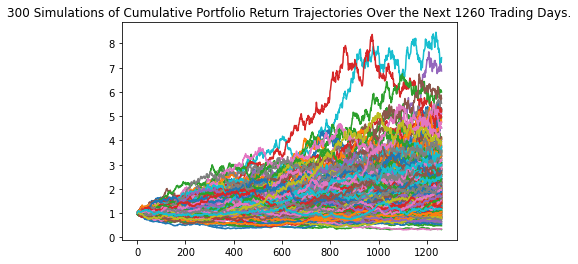

In [17]:
MCfive_year.plot_simulation()

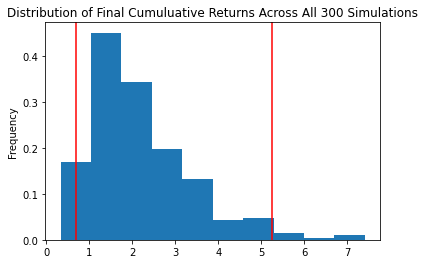

In [18]:
MCfive_year.plot_distribution()

In [19]:
MCfive_year.summarize_cumulative_return()

count           300.000000
mean              2.182453
std               1.181174
min               0.327125
25%               1.387967
50%               1.914507
75%               2.791278
max               7.413558
95% CI Lower      0.686927
95% CI Upper      5.244608
Name: 1260, dtype: float64